<a href="https://colab.research.google.com/github/gourab337/19BCS118/blob/master/Karnataka%20Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyshp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd
import pandas as pd

In [ ]:
!git clone https://github.com/vik4114/map.git

fatal: destination path 'map' already exists and is not an empty directory.


In [ ]:
import shapefile
df1 = gpd.read_file('map/District_Boundary.shp')

r = shapefile.Reader("map/District_Boundary.shp")
df1.head()
points = df1.copy()
points.geometry = points['geometry'].centroid
# same crs
points.crs =df1.crs
# print(points['geometry'][0])

In [ ]:
x=[]
y=[]
for i in points['geometry']:
  x.append(i.x)
  y.append(i.y)
# print(y)

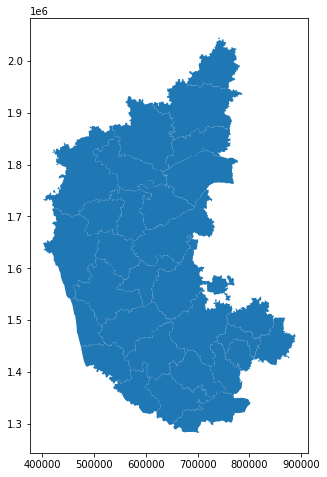

In [ ]:

df1.plot(figsize = (8,8))

In [ ]:
df1 = df1.rename(columns={'KGISDist_1': 'District'})

In [ ]:
len(df1.District)

30

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
with open('dataset.csv', 'r') as data:
    zones = pd.read_csv(data, encoding = ('ansi'))
!rm dataset.csv

Saving dataset.csv to dataset.csv


In [ ]:
# zones = pd.read_csv('drive/MyDrive/31.csv')

zones.head()

,District,Range
0,Belagavi,1
1,Bagalkot,2
2,Vijayapura,3
3,Kalburgi,4
4,Bidar,5


In [ ]:

uploaded = files.upload()
with open('Range.csv', 'r') as data:
    range = pd.read_csv(data, encoding = ('ansi'))
!rm Range.csv

Saving Range.csv to Range.csv


In [ ]:
zones.shape[0]

30

In [ ]:
lis=[]
i=0
while(i<zones.shape[0]):
  if int(zones['Range'][i])>=range['Lower'][0] and int(zones['Range'][i])<=range['Upper'][0]:
    lis.append('Green')
  elif int(zones['Range'][i])>=range['Lower'][1] and int(zones['Range'][i])<=range['Upper'][1]:
    lis.append('Blue')
  elif int(zones['Range'][i])>=range['Lower'][2] and int(zones['Range'][i])<=range['Upper'][2]:
    lis.append('Red')
  else:
    lis.append('Green')
  i+=1

zones['Zone']=lis

In [ ]:
print(zones.shape[0])

30


In [ ]:
newdf = df1.merge(zones[[ 'District', 'Range', 'Zone']], on = ['District'])
newdf = newdf.drop(columns = ['created_us', 'last_edite', 'last_edi_1'])
newdf.head()

,OBJECTID,KGISDistri,District,BhuCodeDis,created_da,SHAPE_STAr,SHAPE_STLe,geometry,Range,Zone
0,1,01,Belagavi,01,None,1.339922e+10,1.142854e+06,"MULTIPOLYGON (((504399.697 1817491.814, 504355...",1,Green
1,2,02,Bagalkot,02,None,6.561945e+09,6.685642e+05,"POLYGON ((579645.967 1748387.143, 579491.116 1...",2,Green
2,3,03,Vijayapura,03,None,1.050303e+10,7.032936e+05,"POLYGON ((636177.875 1786177.573, 635767.770 1...",3,Green
3,4,04,Kalburgi,04,None,1.097529e+10,9.164460e+05,"MULTIPOLYGON (((680658.578 1957069.034, 680648...",4,Green
4,5,05,Bidar,05,None,5.453885e+09,5.747318e+05,"MULTIPOLYGON (((740604.739 2041864.766, 740316...",5,Green


In [ ]:
print(newdf.shape[0])

30


In [ ]:
listc=[]
i=0
while(i<newdf.shape[0]):
  listc.append(newdf['District'][i]+" : "+str(newdf['Range'][i]))
    
  i+=1
  # lis.append(newdf['District'][i]+" : "+newdf['Range'][i])

print(listc)

['Belagavi : 1', 'Bagalkot : 2', 'Vijayapura : 3', 'Kalburgi : 4', 'Bidar : 5', 'Raichur : 6', 'Koppal : 7', 'Gadag : 8', 'Dharwad : 9', 'Uttara Kannada : 10', 'Haveri : 11', 'Ballari : 12', 'Chitradurga : 13', 'Davanagere : 14', 'Shivamogga : 15', 'Udupi : 16', 'Chikkamagaluru : 17', 'Tumakuru : 18', 'Kolara : 19', 'Bengaluru (Urban) : 20', 'Bengaluru (Rural) : 21', 'Mandya : 22', 'Hassan : 23', 'Dakshina Kannada : 24', 'Kodagu : 25', 'Mysuru : 26', 'Chamarajanagara : 27', 'Chikkaballapura : 29', 'Ramanagara : 28', 'Yadgir : 30']


In [ ]:
import json
from bokeh.io import show
from bokeh.io import output_file, save
from bokeh.models import ColumnDataSource, Grid, LinearAxis, Plot, Text, LabelSet
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          CategoricalColorMapper, LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.io import output_notebook
from bokeh.plotting import figure

In [ ]:
source = ColumnDataSource(data=dict(x=x,
                                    y=y,
                                    names=listc))

In [ ]:
geosource = GeoJSONDataSource(geojson = newdf.to_json())

In [ ]:
# Define color palette
palette = ['red', 'blue', 'green']

color_mapper = CategoricalColorMapper(palette = palette, factors = ['Red', 'Blue', 'Green'])


In [ ]:
# Create figure object.
p = figure(title = 'Red, Green and Blue Distric of Covid19',
           plot_height = 2000 ,
           plot_width = 1500, 
           toolbar_location = 'right',
           tools = "pan, wheel_zoom, box_zoom, reset")
p.title.text_font_size = '12pt'
p.title.align = 'center'

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

labels = LabelSet(x='x', y='y', text='names',
              x_offset=-20, y_offset=5, source=source, render_mode='canvas',text_font_size="10pt")
p.add_layout(labels)

# Add patch renderer to figure.
states = p.patches('xs','ys', source = geosource,
                   fill_color = {'field' :'Zone',
                                 'transform' : color_mapper},
                   line_color = 'black',
                   line_width = 0.25, 
                   fill_alpha = 1)
# Create hover tool
p.add_tools(HoverTool(renderers = [states],
                      tooltips = [('District','@District'),
                                  ('Range','@Range')
                                 ]))
from datetime import datetime
now = datetime.now()

current_time = now.strftime("%H:%M:%S")
st='plot'+current_time+'.html'
output_file(st, mode='inline')
save(p)
from google.colab import files
files.download(st)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>